This Notebook contains most figures used in the **ZFIRE survey paper http://adsabs.harvard.edu/abs/2016arXiv160700013N **


Data and other survey information available at http://zfire.swinburne.edu.au/

In [1]:
import matplotlib.pyplot as plt
import pickle

%matplotlib notebook

###  Figure 1
Rest frame UVJ diagram of the galaxy sample selected from ZFOURGE and UKIDSS surveys.

<IPython.core.display.Javascript object>


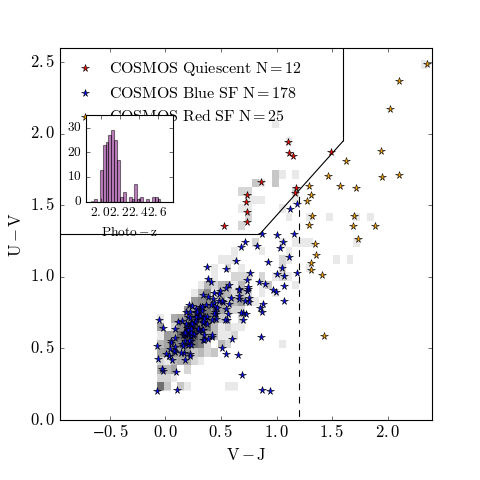

In [2]:
#COSMOS field
fig = pickle.load(file('figures_for_zfire_survey/Rest_frame_UVJ_pre_observed.pickle'))
plt.show()

<IPython.core.display.Javascript object>


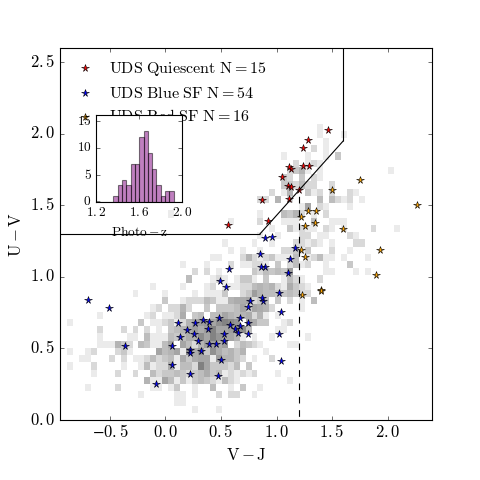

In [3]:
#UDS field
fig = pickle.load(file('figures_for_zfire_survey/Rest_frame_UVJ_pre_observed_UDS.pickle'))
plt.show()

###  Figure 2
The image with masks is availble in the output folder. It is just a screenshot using ZFOURGE Ks image and DS9. 

###  Figure 3
Scaling values applied for COSMOS and UDS masks

<IPython.core.display.Javascript object>


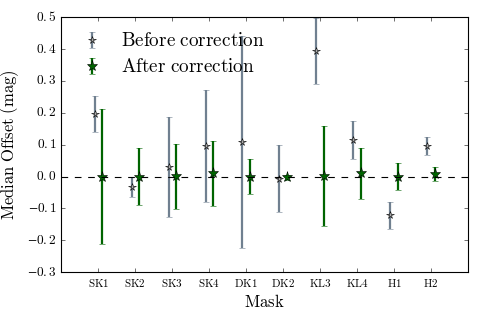

In [4]:
#COSMOS
fig = pickle.load(file('figures_for_zfire_survey/scaling_values_cosmos.pickle'))
plt.show()

<IPython.core.display.Javascript object>


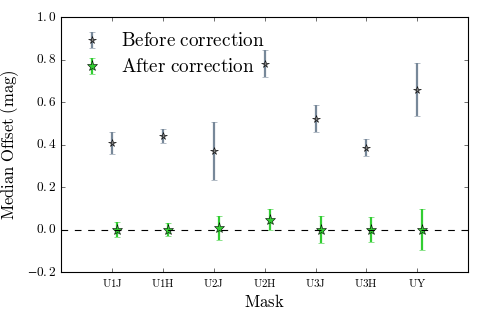

In [5]:
#UDS
fig = pickle.load(file('figures_for_zfire_survey/scaling_values_uds.pickle'))
plt.show()

###  Figure 4
Spectroscopic redshift distribution of ZFIRE

<IPython.core.display.Javascript object>


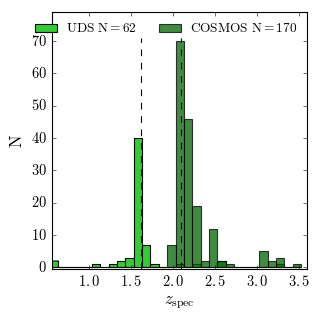

In [6]:
fig = pickle.load(file('figures_for_zfire_survey/ZFIRE_zspec.pickle'))
plt.show()

###  Figure 5
Example Spectra plot.

You will need **astropy**, **numpy** and **pandas** packages. 

In [7]:
from astropy.io import fits as pf
import pandas as pd
import numpy as np

In [8]:
def get_lambda(scidata, hdr):
    
    CRVAL1, CD1_1 , CRPIX1 = hdr['CRVAL1'], hdr['CD1_1'], hdr['CRPIX1']
    i_w        = np.arange(len(scidata)) + 1
    wavelength = ((i_w - CRPIX1) * CD1_1 ) + CRVAL1 
    
    return wavelength
    
def get_limits(hdr,low_x, high_x):
    
    CRVAL1, CD1_1 , CRPIX1        = hdr['CRVAL1'], hdr['CD1_1'], hdr['CRPIX1']
    pix_low, pix_high = np.int(((low_x - CRVAL1) / CD1_1 ) + CRPIX1), np.int(((high_x - CRVAL1) / CD1_1 ) + CRPIX1)
    
    return pix_low, pix_high

def make_subplots_1D(ax,flux_1D,error_1D,wavelength, xlim,z,Name,Band, conf):
    
    
    ax.step(wavelength ,flux_1D, linewidth=1.0,ls='-',
             color='b', alpha=1.0, label='$\mathrm{Flux}$')
    
    ax.step(wavelength ,error_1D, linewidth=0.5,ls='-',
             color='r', alpha=1.0, label='$\mathrm{Error}$')
    
    ax.fill_between(wavelength, flux_1D-error_1D, flux_1D+error_1D,linewidth=0,
                 facecolor='cyan', interpolate=True, edgecolor='white')
   
    if (Name!='9593') and (Name!='7547')  and (Name!='5155') :

        plt.axvline(x=(z+1)*5008.240, ls='--', c='k')
        ax.text(((z+1)*5008.240)+5,
                np.min(flux_1D[(wavelength>xlim[0]) & (wavelength<xlim[1])])*0.85, 
                '$\mathrm{[OIII]}$' )

        plt.axvline(x=(z+1)*4960.295, ls='--', c='k')
        ax.text(((z+1)*4960.295)+5,
                np.min(flux_1D[(wavelength>xlim[0]) & (wavelength<xlim[1])])*0.85, 
                '$\mathrm{[OIII]}$' )

        plt.axvline(x=(z+1)*3728.000, ls='--', c='k')
        ax.text(((z+1)*3728.000)+5,
                np.min(flux_1D[(wavelength>xlim[0]) & (wavelength<xlim[1])])*0.85, 
                '$\mathrm{[OII]}$' )

        plt.axvline(x=(z+1)*4862.680, ls='--', c='k')
        ax.text(((z+1)*4862.680)+5,
                np.min(flux_1D[(wavelength>xlim[0]) & (wavelength<xlim[1])])*0.85, 
                r'$\mathrm{H\beta}$' )

        plt.axvline(x=(z+1)*6564.610, ls='--', c='k')
        ax.text(((z+1)*6564.610)+5,
                np.min(flux_1D[(wavelength>xlim[0]) & (wavelength<xlim[1])])*0.85, 
                r'$\mathrm{H\alpha}$' )

        plt.axvline(x=(z+1)*6585.270, ls='--', c='k')
        ax.text(((z+1)*6585.270)+20,
                np.min(flux_1D[(wavelength>xlim[0]) & (wavelength<xlim[1])])*0.85, 
                '$\mathrm{[NII]}$' )

        plt.axvline(x=(z+1)*6549.860, ls='--', c='k')
        ax.text(((z+1)*6549.860)-120,
                np.min(flux_1D[(wavelength>xlim[0]) & (wavelength<xlim[1])])*0.85, 
                '$\mathrm{[NII]}$' )

        plt.axvline(x=(z+1)*6718.290, ls='--', c='k')
        ax.text(((z+1)*6718.290)-120,
                np.min(flux_1D[(wavelength>xlim[0]) & (wavelength<xlim[1])])*0.85, 
                '$\mathrm{[SII]}$' )

        plt.axvline(x=(z+1)*6732.670, ls='--', c='k')
        ax.text(((z+1)*6732.670)+10,
                np.min(flux_1D[(wavelength>xlim[0]) & (wavelength<xlim[1])])*0.85, 
                '$\mathrm{[SII]}$' )

    

    plt.ylabel(r'$\mathrm{Flux\ (10^{-17}ergs/s/cm^2/\AA)}$' ,fontsize=10)
    plt.xlim(xlim[0], xlim[1])
    
    if Name=='3633':
        plt.ylim(-0.2,0.78)
        ax.text( xlim[1]-350, 0.6, 
                        ('$\mathrm{'+str(Name)+'\ '+str(Band)+'}$'+'\n'+'$\mathrm{'+ 'Q_z='+str(conf)+'}$'))
    elif Name=='9593':
        plt.ylim(-0.2,0.2)
        ax.text( xlim[1]-350, 0.10, 
                        ('$\mathrm{'+str(Name)+'\ '+str(Band)+'}$'+'\n'+'$\mathrm{'+ 'Q_z='+str(conf)+'}$'))
    elif Name=='3883':
        plt.ylim(-0.1,0.2)
        ax.text( xlim[1]-330, 0.12, 
                        ('$\mathrm{'+str(Name)+'\ '+str(Band)+'}$'+'\n'+'$\mathrm{'+ 'Q_z='+str(conf)+'}$'))
    elif Name=='7547':
        plt.ylim(-0.2,0.4)
        ax.text( xlim[1]-350, -0.2, 
                        ('$\mathrm{'+str(Name)+'\ '+str(Band)+'}$'+'\n'+'$\mathrm{'+ 'Q_z='+str(conf)+'}$'))
    elif Name=='5155':
        plt.ylim(-0.2,0.38)
        ax.text( xlim[1]-350, 0.2, 
                        ('$\mathrm{'+str(Name)+'\ '+str(Band)+'}$'+'\n'+'$\mathrm{'+ 'Q_z='+str(conf)+'}$'))
        
    else:
    
        plt.ylim(np.min(flux_1D[(wavelength>xlim[0]) & (wavelength<xlim[1])])*0.95, 
                 np.max(flux_1D[(wavelength>xlim[0]) & (wavelength<xlim[1])])*1.05)
        
        if Band=='H\ band':
            ax.text( xlim[1]-250, 
                    np.max(flux_1D[(wavelength>xlim[0]) & (wavelength<xlim[1])])*0.60, 
                    ('$\mathrm{'+str(Name)+'\ '+str(Band))+'}$'+'\n'+'$\mathrm{'+ 'Q_z='+str(conf)+'}$')
        else:
            ax.text( xlim[1]-350, 
                        np.max(flux_1D[(wavelength>xlim[0]) & (wavelength<xlim[1])])*0.75, 
                        ('$\mathrm{'+str(Name)+'\ '+str(Band))+'}$'+'\n'+'$\mathrm{'+ 'Q_z='+str(conf)+'}$')
    # We change the fontsize of minor ticks label 
    plt.tick_params(axis='both', which='major', labelsize=10)
    #plt.tick_params(axis='both', which='minor', labelsize=15)
    
    

def make_subplots_2D(spectra_2D,xlim, xlabel=False):
    
    
    pix_limit_low, pix_limit_high = get_limits(hdr, xlim[0], xlim[1])
    
    
    spectra_2D = spectra_2D[:, pix_limit_low: pix_limit_high]
    
    
    plt.imshow(spectra_2D, aspect = 'auto', cmap='gist_gray',
               extent= ( xlim[0], xlim[1] , 40 , 0) ,vmin=-1e-19, vmax=9e-20 )
    
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    #extent = left, right, bottom, top
    plt.tick_params(axis='both', which='major', labelsize=10)
    
    if xlabel==True:
        plt.xlabel(r'$\mathrm{Wavelength\ (\AA)}$',fontsize=12)


    


<IPython.core.display.Javascript object>


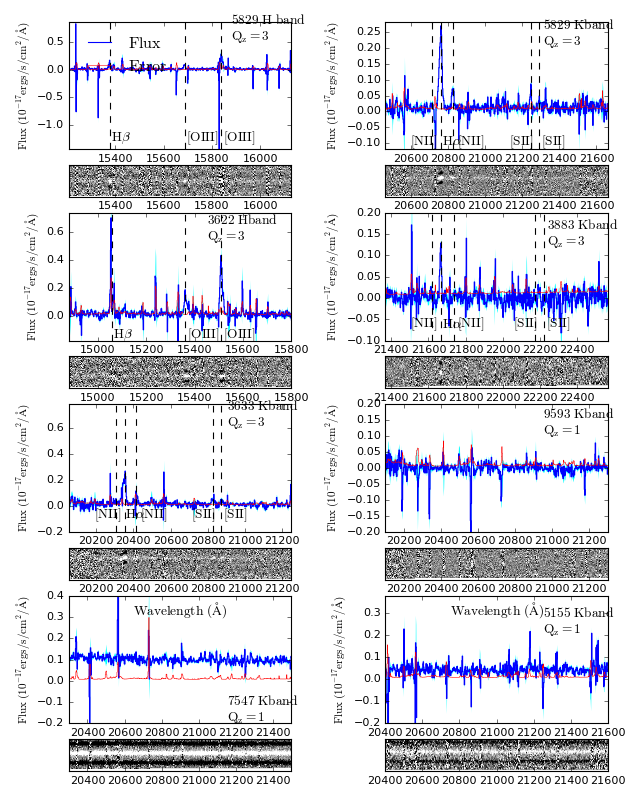

In [9]:
ZFIRE_ZF = pd.read_csv('data/zfire/zfire_cosmos_master_table_dr1.1.csv', index_col='Nameobj')

delta_lambda = 300

fig= plt.subplots(figsize=(8,10), sharex=True, sharey=True)

ax1 = plt.subplot2grid((16,2), (0,0), colspan=1, rowspan=3) 
eps = pf.open('data/spectra/Hbandmask1_H_H_S03_SF_5829_eps_t_fc_coadd.fits')
flux_2D = eps[0].data 

spectra_1D     = pf.open('data/spectra/Hbandmask1_H_H_S03_SF_5829_eps_t_fc_coadd_1D.fits')

hdr      = eps[0].header
flux_1D  = spectra_1D[0].data
error_1D = spectra_1D[1].data
wave_1D  = spectra_1D[2].data

wavelength = get_lambda(flux_1D, hdr)

Name='5829'
emission = (ZFIRE_ZF.ix[Name].zspec+1)*5008.240

make_subplots_1D(ax1,flux_1D,error_1D,wavelength, 
                 [emission-(2.1*delta_lambda), emission+(delta_lambda-10)], 
                 ZFIRE_ZF.ix[Name].zspec, Name, r'H\ band', ZFIRE_ZF.ix[Name].conf)

plt.legend(loc='upper left', fontsize='large', ncol=1, frameon=False)

ax2 = plt.subplot2grid((16,2), (3,0), colspan=1, rowspan=1) 
make_subplots_2D(flux_2D,[emission-(2.1*delta_lambda), emission+(delta_lambda-10)])

####################################################################################

ax3 = plt.subplot2grid((16,2), (0,1), colspan=1, rowspan=3) 
eps = pf.open('data/spectra/shallowmask3_K_K_S11_SF_5829_eps_t_fc_coadd.fits')
flux_2D = eps[0].data 

spectra_1D     = pf.open('data/spectra/shallowmask3_K_K_S11_SF_5829_eps_t_fc_coadd_1D.fits')

hdr      = eps[0].header
flux_1D  = spectra_1D[0].data
error_1D = spectra_1D[1].data
wave_1D  = spectra_1D[2].data

wavelength = get_lambda(flux_1D, hdr)


Name='5829'

emission = (ZFIRE_ZF.ix[Name].zspec+1)*6564.61

make_subplots_1D(ax3,flux_1D,error_1D,wavelength, 
                 [emission-(1*delta_lambda), emission+(delta_lambda*3)], 
                 ZFIRE_ZF.ix[Name].zspec, Name, 'K band',ZFIRE_ZF.ix[Name].conf)



ax4 = plt.subplot2grid((16,2), (3,1), colspan=1, rowspan=1) 
make_subplots_2D(flux_2D,[emission-(1*delta_lambda), emission+(delta_lambda*3)])

####################################################################################
####################################################################################
ax5 = plt.subplot2grid((16,2), (4,0), colspan=1, rowspan=3) 
eps = pf.open('data/spectra/Hbandmask2_H_H_S08_SF_3622_eps_t_fc.fits')
flux_2D = eps[0].data 

spectra_1D     = pf.open('data/spectra/Hbandmask2_H_H_S08_SF_3622_eps_t_fc_1D.fits')

hdr      = eps[0].header
flux_1D  = spectra_1D[0].data
error_1D = spectra_1D[1].data
wave_1D  = spectra_1D[2].data

wavelength = get_lambda(flux_1D, hdr)

low_H = 14650; high_H = 17960
low_K = 19600; high_K = 23900

Name='3622'
emission = (ZFIRE_ZF.ix[Name].zspec+1)*5008.240

make_subplots_1D(ax5,flux_1D,error_1D,wavelength, 
                 [emission-(2.1*delta_lambda), emission+(delta_lambda-10)], 
                 ZFIRE_ZF.ix[Name].zspec, Name, 'H band',ZFIRE_ZF.ix[Name].conf)



ax6 = plt.subplot2grid((16,2), (7,0), colspan=1, rowspan=1) 
make_subplots_2D(flux_2D,[emission-(2.1*delta_lambda), emission+(delta_lambda-10)])

####################################################################################

ax7 = plt.subplot2grid((16,2), (4,1), colspan=1, rowspan=3) 
eps = pf.open('data/spectra/shallowmask3_K_K_S03_SF_BKG_3883_eps_t_fc_coadd.fits')
flux_2D = eps[0].data 

spectra_1D     = pf.open('data/spectra/shallowmask3_K_K_S03_SF_BKG_3883_eps_t_fc_coadd_1D.fits')

hdr      = eps[0].header
flux_1D  = spectra_1D[0].data
error_1D = spectra_1D[1].data
wave_1D  = spectra_1D[2].data

wavelength = get_lambda(flux_1D, hdr)


Name='3883'
emission = (ZFIRE_ZF.ix[Name].zspec+1)*6564.61

make_subplots_1D(ax7,flux_1D,error_1D,wavelength, 
                 [emission-(1*delta_lambda), emission+(delta_lambda*3)], 
                 ZFIRE_ZF.ix[Name].zspec, Name, 'K band',ZFIRE_ZF.ix[Name].conf)



ax8 = plt.subplot2grid((16,2), (7,1), colspan=1, rowspan=1) 
make_subplots_2D(flux_2D,[emission-(1*delta_lambda), emission+(delta_lambda*3)])


####################################################################################
####################################################################################
####################################################################################
####################################################################################

ax9 = plt.subplot2grid((16,2), (12,0), colspan=1, rowspan=3) 
eps = pf.open('data/spectra/shallowmask2_K_K_S25_BCG_D_7547_eps_t_fc_coadd.fits')
flux_2D = eps[0].data 

spectra_1D     = pf.open('data/spectra/shallowmask2_K_K_S25_BCG_D_7547_eps_t_fc_coadd_1D.fits')

hdr      = eps[0].header
flux_1D  = spectra_1D[0].data
error_1D = spectra_1D[1].data
wave_1D  = spectra_1D[2].data

wavelength = get_lambda(flux_1D, hdr)

low_H = 14650; high_H = 17960
low_K = 19600; high_K = 23900

Name='7547'
#emission = (ZFIRE_ZF.ix[Name].zspec+1)*6564.61
emission = 20600


make_subplots_1D(ax9,flux_1D,error_1D,wavelength, 
                 [emission-(1*delta_lambda), emission+(delta_lambda*3)], 
                 ZFIRE_ZF.ix[Name].zspec, Name, 'K band',ZFIRE_ZF.ix[Name].conf)



ax10 = plt.subplot2grid((16,2), (15,0), colspan=1, rowspan=1) 
make_subplots_2D(flux_2D,[emission-(1*delta_lambda), emission+(delta_lambda*3)])

####################################################################################

ax11 = plt.subplot2grid((16,2), (12,1), colspan=1, rowspan=3) 
eps = pf.open('data/spectra/shallowmask1_K_K_S05_BCG_A_5155_eps_t_fc_coadd.fits')
flux_2D = eps[0].data 

spectra_1D     = pf.open('data/spectra/shallowmask1_K_K_S05_BCG_A_5155_eps_t_fc_coadd_1D.fits')

hdr      = eps[0].header
flux_1D  = spectra_1D[0].data
error_1D = spectra_1D[1].data
wave_1D  = spectra_1D[2].data

wavelength = get_lambda(flux_1D, hdr)


Name='5155'
#emission = (ZFIRE_ZF.ix[Name].zspec+1)*6564.61
emission = 20700
make_subplots_1D(ax11,flux_1D,error_1D,wavelength, 
                 [emission-(1*delta_lambda), emission+(delta_lambda*3)], 
                 ZFIRE_ZF.ix[Name].zspec, Name, 'K band',ZFIRE_ZF.ix[Name].conf)



ax12 = plt.subplot2grid((16,2), (15,1), colspan=1, rowspan=1) 
make_subplots_2D(flux_2D,[emission-(1*delta_lambda), emission+(delta_lambda*3)])



####################################################################################
####################################################################################

ax13 = plt.subplot2grid((16,2), (8,0), colspan=1, rowspan=3) 
eps = pf.open('data/spectra/DeepKband2_K_K_S05_SF_3633_eps_t_fc.fits')
flux_2D = eps[0].data 

spectra_1D     = pf.open('data/spectra/DeepKband2_K_K_S05_SF_3633_eps_t_fc_1D.fits')

hdr      = eps[0].header
flux_1D  = spectra_1D[0].data
error_1D = spectra_1D[1].data
wave_1D  = spectra_1D[2].data

wavelength = get_lambda(flux_1D, hdr)

low_H = 14650; high_H = 17960
low_K = 19600; high_K = 23900

Name='3633'
emission = (ZFIRE_ZF.ix[Name].zspec+1)*6564.61

make_subplots_1D(ax13,flux_1D,error_1D,wavelength, 
                 [emission-(1*delta_lambda), emission+(delta_lambda*3)], 
                 ZFIRE_ZF.ix[Name].zspec, Name, 'K band',ZFIRE_ZF.ix[Name].conf)



ax14 = plt.subplot2grid((16,2), (11,0), colspan=1, rowspan=1) 
make_subplots_2D(flux_2D,[emission-(1.0*delta_lambda), emission+(delta_lambda*3)], xlabel=True)

####################################################################################

ax15 = plt.subplot2grid((16,2), (8,1), colspan=1, rowspan=3) 
eps = pf.open('data/spectra/shallowmask3_K_K_S31_SF_9593_eps_t_fc_coadd.fits')
flux_2D = eps[0].data 

spectra_1D     = pf.open('data/spectra/shallowmask3_K_K_S31_SF_9593_eps_t_fc_coadd_1D.fits')

hdr      = eps[0].header
flux_1D  = spectra_1D[0].data
error_1D = spectra_1D[1].data
wave_1D  = spectra_1D[2].data

wavelength = get_lambda(flux_1D, hdr)


Name='9593'
#emission = (ZFIRE_ZF.ix[Name].zspec+1)*6564.61
emission = 20400

make_subplots_1D(ax15,flux_1D,error_1D,wavelength, 
                 [emission-(1*delta_lambda), emission+(delta_lambda*3)], 
                 ZFIRE_ZF.ix[Name].zspec, Name, 'K band',ZFIRE_ZF.ix[Name].conf)



ax16 = plt.subplot2grid((16,2), (11,1), colspan=1, rowspan=1) 
make_subplots_2D(flux_2D,[emission-(1*delta_lambda), emission+(delta_lambda*3)], xlabel=True)

####################################################################################


plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.savefig('outputs/spectra.pdf', dpi=400)
plt.show()
#plt.close()


###  Figure 6
Stacked p(z) distributions from EAZY.

<IPython.core.display.Javascript object>


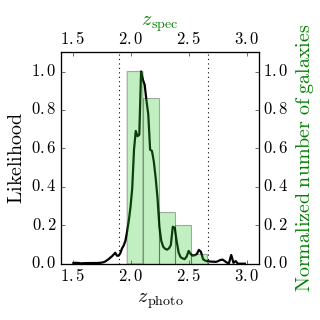

In [10]:
fig = pickle.load(file('figures_for_zfire_survey/pz.pickle'))
plt.show()

###  Figure 7
ZFIRE detection properties. Shows H-alpha luminosities, SNR, and SFR values. 

<IPython.core.display.Javascript object>


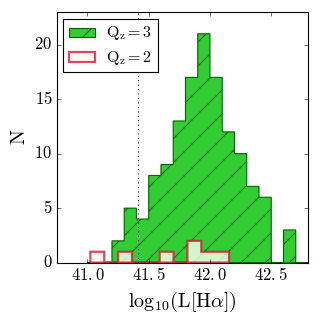

In [11]:
#H-alpha luminosity
fig = pickle.load(file('figures_for_zfire_survey/Halpha_luminosity.pickle'))
plt.show()

<IPython.core.display.Javascript object>


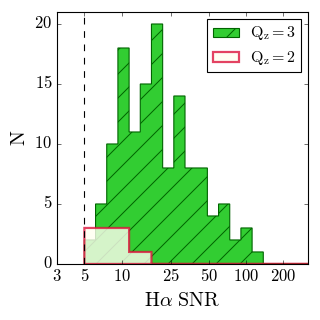

In [12]:
#H-alpha SNR
fig = pickle.load(file('figures_for_zfire_survey/Halpha_SNR.pickle'))
plt.show()

<IPython.core.display.Javascript object>


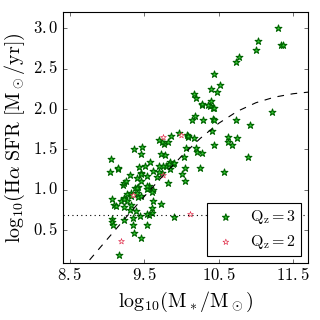

In [13]:
#H-alpha SFRs
fig = pickle.load(file('figures_for_zfire_survey/lmass_vs_HaSFR.pickle'))
plt.show()

###  Figure 8
Ks magnitude and stellar mass distribution of ZFIRE detections

<IPython.core.display.Javascript object>


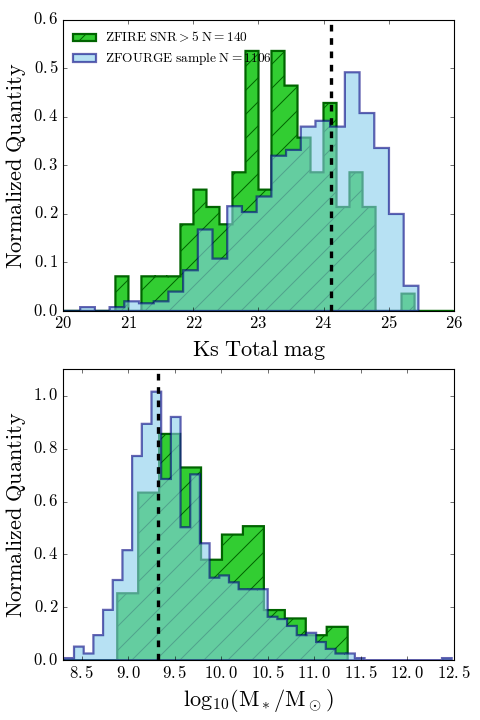

In [14]:
fig = pickle.load(file('figures_for_zfire_survey/detected_limits.pickle'))
plt.show()

###  Figure 9
Rest frame UVJ of COSMOS field ZFIRE detected sample. 

<IPython.core.display.Javascript object>


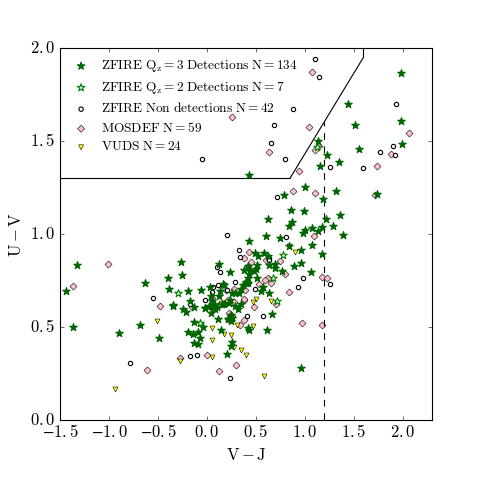

In [15]:
fig = pickle.load(file('figures_for_zfire_survey/Rest_frame_UVJ.pickle'))
plt.show()

###  Figure 10
7th nearest neighbour density distribution of the COSMOS field. 

<IPython.core.display.Javascript object>


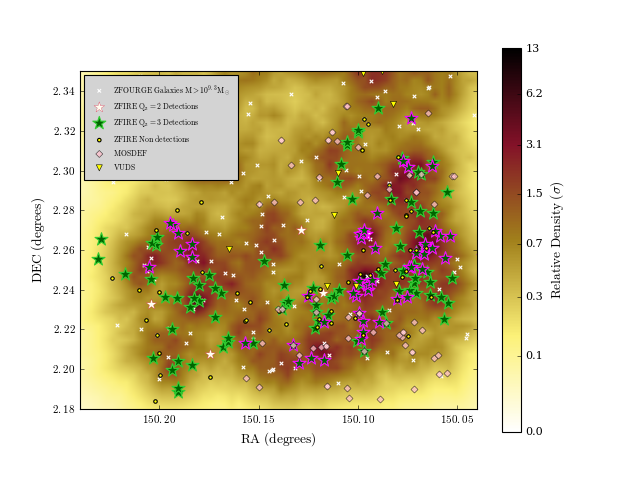

In [16]:
fig = pickle.load(file('figures_for_zfire_survey/densityMap7NN_2.0<z<2.2_7NN.pickle'))
plt.show()

###  Figure 11
Density histogram. 

<IPython.core.display.Javascript object>


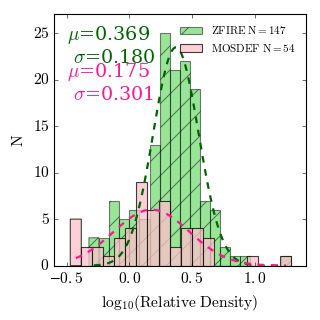

In [17]:
#all galaxies
fig = pickle.load(file('figures_for_zfire_survey/density_hist_all.pickle'))
plt.show()

<IPython.core.display.Javascript object>


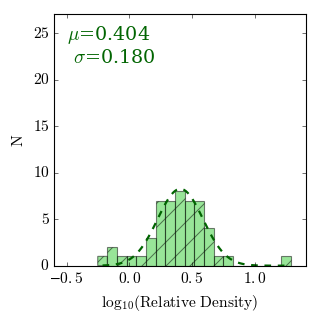

In [18]:
#cluster galaxies
fig = pickle.load(file('figures_for_zfire_survey/density_hist_cluster.pickle'))
plt.show()

###  Figure 12
spec-z photo-z comparision for ZFOURGE and UKIDSS

<IPython.core.display.Javascript object>


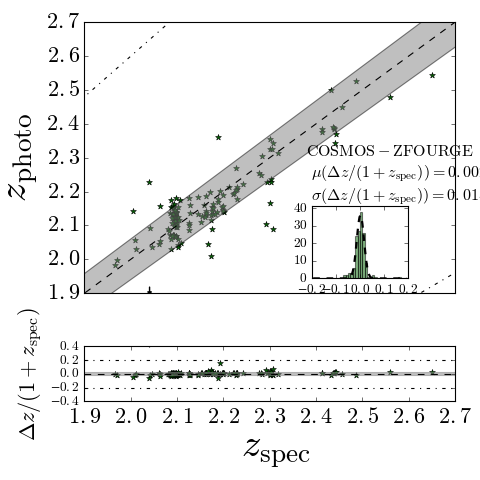

In [19]:
#ZFOURGE
fig = pickle.load(file('figures_for_zfire_survey/specz_vs_photo_z_COSMOS_v3.1.pickle'))
plt.show()

<IPython.core.display.Javascript object>


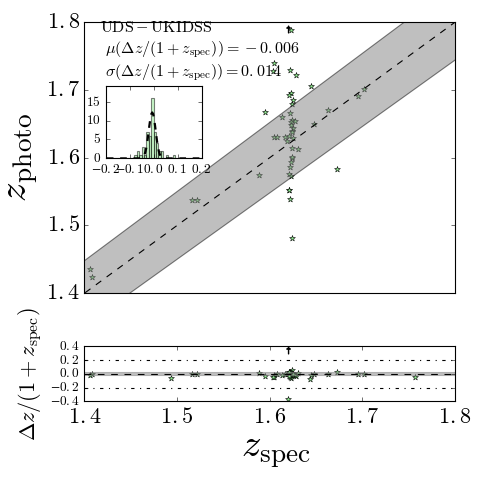

In [20]:
#UKIDSS
fig = pickle.load(file('figures_for_zfire_survey/specz_vs_photo_z_UDS.pickle'))
plt.show()

###  Figure 13
spec-z photo-z comparision for NMBS and 3DHST (Photometric)

<IPython.core.display.Javascript object>


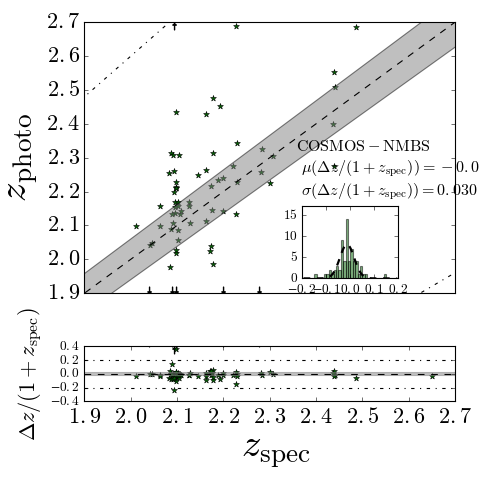

In [21]:
#NMBS
fig = pickle.load(file('figures_for_zfire_survey/specz_vs_photo_z_NMBS.pickle'))
plt.show()

<IPython.core.display.Javascript object>


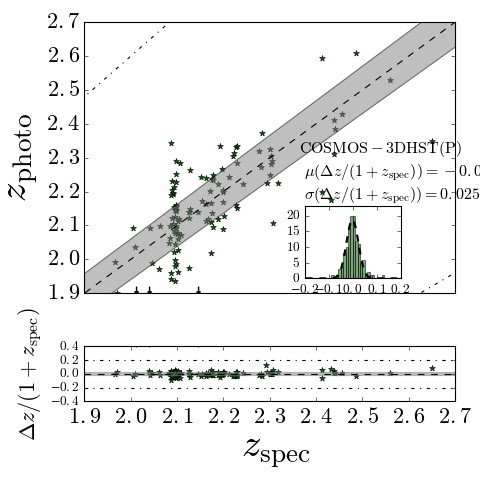

In [22]:
#3DHST(P)
fig = pickle.load(file('figures_for_zfire_survey/specz_vs_photo_z_3DHST_photo.pickle'))
plt.show()

###  Figure 14
3DHST Grism comparision with spec-z.

<IPython.core.display.Javascript object>


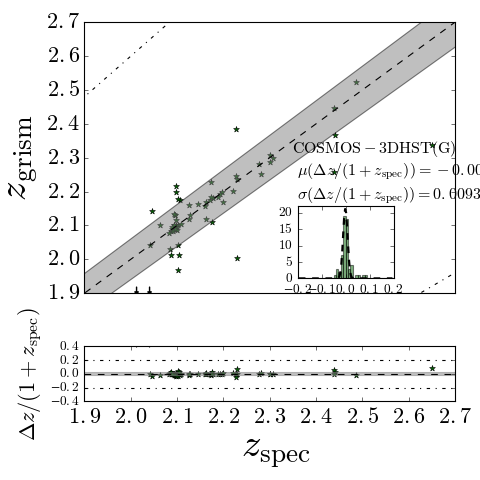

In [23]:
#3DHST(G)
fig = pickle.load(file('figures_for_zfire_survey/specz_vs_3DHST_grism.pickle'))
plt.show()

###  Figure 15
ZFIRE z-spec distribution with Ks and mass. 

<IPython.core.display.Javascript object>


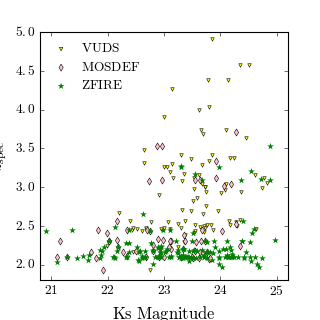

In [24]:
#Ks
fig = pickle.load(file('figures_for_zfire_survey/zspec_vs_Ks.pickle'))
plt.show()

<IPython.core.display.Javascript object>


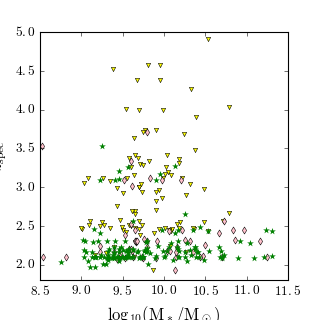

In [25]:
#mass
fig = pickle.load(file('figures_for_zfire_survey/zspec_vs_mass.pickle'))
plt.show()

###  Figure 16
Redshift error with Ks and mass. 

<IPython.core.display.Javascript object>


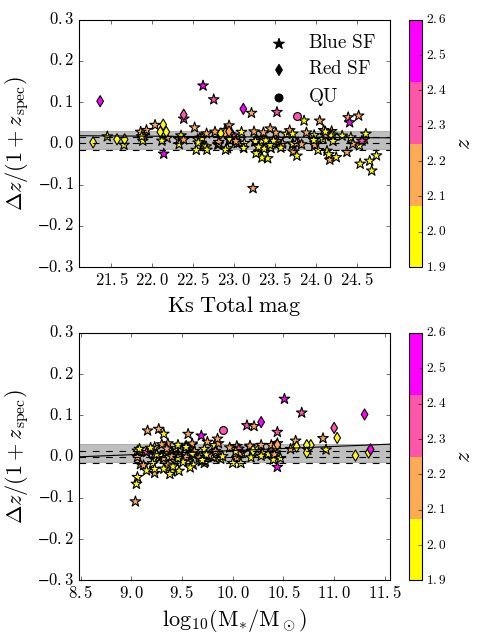

In [26]:
fig = pickle.load(file('figures_for_zfire_survey/delta_z_vs_mass_mag.pickle'))
plt.show()

###  Figure 17
Mass, SFR error with redshift error.

<IPython.core.display.Javascript object>


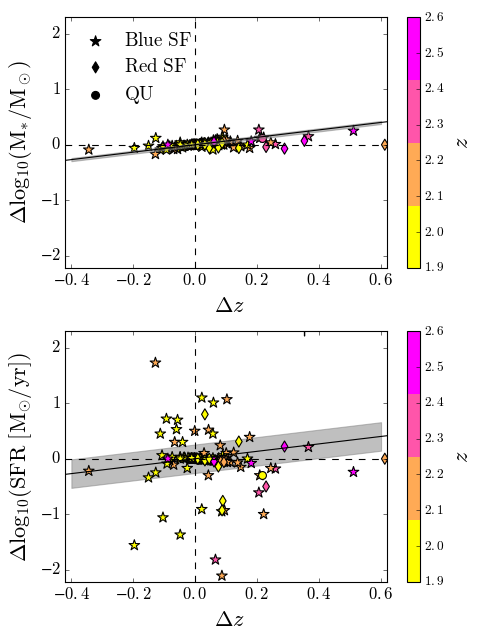

In [27]:
fig = pickle.load(file('figures_for_zfire_survey/delta_mass_lsfr_vs_delta_z.pickle'))
plt.show()

###  Figure 18
Change in rest frame UVJ colours with redshift.

<IPython.core.display.Javascript object>


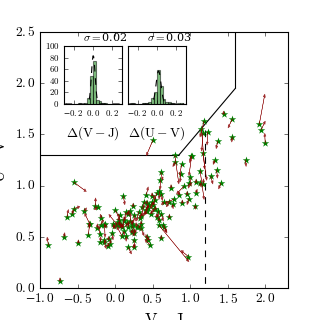

In [28]:
fig = pickle.load(file('figures_for_zfire_survey/Rest_frame_UVJ_arrows.pickle'))
plt.show()

# Plots in the Appendix starts here

###  Figure 19
Telluric sensitivity plots. Requires astropy.

In [29]:
from astropy.io import fits as pf
from astropy.io import ascii


In [30]:
def get_lambda(scidata, hdr):
    
    CRVAL1, CD1_1 , CRPIX1 = hdr['CRVAL1'], hdr['CD1_1'], hdr['CRPIX1']
    i_w        = np.arange(len(scidata)) + 1
    wavelength = ((i_w - CRPIX1) * CD1_1 ) + CRVAL1 
    
    return wavelength
    
def get_limits(hdr,low_x, high_x):
    
    CRVAL1, CD1_1 , CRPIX1        = hdr['CRVAL1'], hdr['CD1_1'], hdr['CRPIX1']
    pix_low, pix_high = np.int(((low_x - CRVAL1) / CD1_1 ) + CRPIX1), np.int(((high_x - CRVAL1) / CD1_1 ) + CRPIX1)
    
    return pix_low, pix_high




In [31]:
atmos_trans = ascii.read('data/sensitivity_curves/trans_16_15.dat')

K_MOSFIRE     = ascii.read('data/sensitivity_curves/Keff_mosfire+tel.dat.txt')
K_Feige_1D    = pf.open('data/sensitivity_curves/telluric_Feige15_shallowmask1_v3_2013dec24_K_1d.fits')[0].data
K_Feige_sens  = pf.open('data/sensitivity_curves/sens_Feige15_shallowmask1_v3_2013dec24_K_1d.fits')[0].data
K_Feige_wave  = pf.open('data/sensitivity_curves/sens_Feige15_shallowmask1_v3_2013dec24_K_1d_wave.fits')[0].data
K_Feige_2D    = pf.open('data/sensitivity_curves/rectified_Telluric_K_Feige15_K_A-B_0225-0226.fits')


H_MOSFIRE        = ascii.read('data/sensitivity_curves/Heff_mosfire+tel.dat.txt')
H_HIP24508_1D    = pf.open('data/sensitivity_curves/telluric_HIP24508_Hbandmask1_2014feb10_H_1D.fits')[0].data
H_HIP24508_sens  = pf.open('data/sensitivity_curves/sens_HIP24508_Hbandmask1_2014feb10_H_1d.fits')[0].data
H_HIP24508_wave  = pf.open('data/sensitivity_curves/sens_HIP24508_Hbandmask1_2014feb10_H_1d_wave.fits')[0].data
H_HIP24508_2D    = pf.open('data/sensitivity_curves/rectified_longslit_telluric_H_HIP24508_H_A-B.fits')


J_MOSFIRE     = ascii.read('data/sensitivity_curves/Jeff_mosfire+tel.dat.txt')
J_Feige_1D    = pf.open('data/sensitivity_curves/telluric_Feige15_DEC2013_uds1_2013dec24_J_1D.fits')[0].data
J_Feige_sens  = pf.open('data/sensitivity_curves/sens_Feige15_DEC2013_uds1_2013dec24_J_1d.fits')[0].data
J_Feige_wave  = pf.open('data/sensitivity_curves/sens_Feige15_uds2_2013dec24_J_1d_wave.fits')[0].data
J_Feige_2D    = pf.open('data/sensitivity_curves/rectified_Telluric_J_Feige15_J_A-B_0229-0230.fits')


Y_MOSFIRE        = ascii.read('data/sensitivity_curves/Yeff_mosfire+tel.dat.txt')
Y_HIP24508_1D    = pf.open('data/sensitivity_curves/telluric_HIP24508_uds-y1_2014feb10_Y_1D.fits')[0].data
Y_HIP24508_sens  = pf.open('data/sensitivity_curves/sens_HIP24508_uds-y1_2014feb10_Y_1d.fits')[0].data
Y_HIP24508_wave  = pf.open('data/sensitivity_curves/sens_HIP24508_uds-y1_2014feb10_Y_1d_wave.fits')[0].data
Y_HIP24508_2D    = pf.open('data/sensitivity_curves/rectified_longslit_HIP24508_beg_HIP24508_Y_A-B_0060-0061.fits')




In [32]:
low_Y = 9750; high_Y = 11235
low_J = 11535; high_J = 13515
low_H = 14650; high_H = 17960
low_K = 19600; high_K = 23900

In [33]:
def make_subplots_1D(ax,derived_sensitivity,MOSFIRE_response,atmos_trans,wavelength,flux, band, low, high):
    
    
    ax.plot(wavelength , derived_sensitivity , linewidth=1.0,ls='-',
             color='k', alpha=1.0, label='Derived Sensitivity')

    ax.plot(MOSFIRE_response['Lambda'] , MOSFIRE_response['sens'] , linewidth=1.0,
             color='b', alpha=1.0, label='Keck+MOSFIRE throughput')

    ax.plot(atmos_trans['wavelngth(micron)']*(10**4) , atmos_trans['transmission'] , linewidth=1.0,
             color='g', alpha=1.0, label='Atmospheric transmission')

    ax.plot(wavelength, flux/ max(flux) , linewidth=0.5,
                 c='brown', alpha=1.0, label='Normalized observed spectra of standard star')
    
    ax.plot(wavelength , derived_sensitivity*flux/ max(derived_sensitivity*flux) , linewidth=1.0,
             color='c', alpha=1.0, label='Normalized corrected spectra of standard star')

    if band =='Y' or band=='H':
        plt.ylabel(r' Multiplicative fraction ' ,fontsize=20)   
    plt.xlim(low,high)
    plt.ylim(-0.01, 1.4)
    # We change the fontsize of minor ticks label 
    plt.tick_params(axis='both', which='major', labelsize=15)
    #plt.tick_params(axis='both', which='minor', labelsize=15)
    if band=='Y':
        plt.legend(loc='upper left', fontsize='large', ncol=2, frameon=False)

def make_subplots_2D(star_2D,band, low_x, high_x, yl_pix, yh_pix):
    

    pix_limit_low, pix_limit_high = get_limits(hdr, low_x, high_x)
    
    
    image = star_2D[0].data[yl_pix: yh_pix, pix_limit_low: pix_limit_high]
    
    plt.imshow(image, aspect = 'auto', cmap='gist_gray', extent = ( low_x, high_x , yh_pix-yl_pix , 0) )
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    #extent = left, right, bottom, top
    plt.tick_params(axis='both', which='major', labelsize=15)
    
    if band =='H' or band=='K':
        plt.xlabel(r' Wavelength ($\mathrm{\AA}$) ',fontsize=20)


    

/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


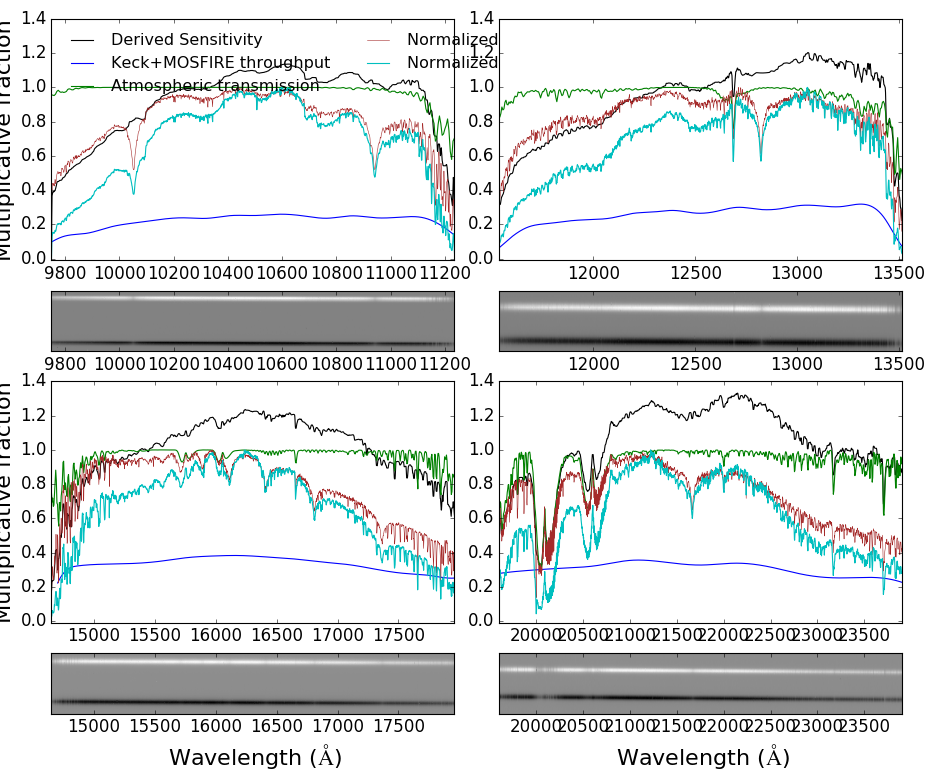

In [34]:



#fig = plt.subplots(2, figsize=(8,6), sharex=True)

fig= plt.subplots(figsize=(16,12), sharex=True, sharey=True)

ax1 = plt.subplot2grid((8,2), (0,0), colspan=1, rowspan=3) 
flux = Y_HIP24508_2D[0].data; hdr = Y_HIP24508_2D[0].header
wavelength = get_lambda(flux, hdr)
make_subplots_1D(ax1,Y_HIP24508_sens,Y_MOSFIRE,atmos_trans,Y_HIP24508_wave,Y_HIP24508_1D,'Y',low_Y, high_Y )
ax2 = plt.subplot2grid((8,2), (3,0), colspan=1, rowspan=1) 
make_subplots_2D(Y_HIP24508_2D,'Y',low_Y, high_Y, 1000, 1075)


ax3 = plt.subplot2grid((8,2), (0,1), colspan=1, rowspan=3) 
flux = J_Feige_2D[0].data; hdr = J_Feige_2D[0].header
wavelength = get_lambda(flux, hdr)
make_subplots_1D(ax3,J_Feige_sens,J_MOSFIRE,atmos_trans,J_Feige_wave,J_Feige_1D,'J',low_J, high_J )
ax4 = plt.subplot2grid((8,2), (3,1), colspan=1, rowspan=1) 
make_subplots_2D(J_Feige_2D,'J',low_J, high_J,1015,1055)



ax5 = plt.subplot2grid((8,2), (4,0), colspan=1, rowspan=3) 
flux = H_HIP24508_2D[0].data; hdr = H_HIP24508_2D[0].header
wavelength = get_lambda(flux, hdr)
make_subplots_1D(ax5,H_HIP24508_sens,H_MOSFIRE,atmos_trans,H_HIP24508_wave,H_HIP24508_1D,'H',low_H, high_H )
ax6 = plt.subplot2grid((8,2), (7,0), colspan=1, rowspan=1) 
make_subplots_2D(H_HIP24508_2D,'H',low_H, high_H, 995,1080)


ax7 = plt.subplot2grid((8,2), (4,1), colspan=1, rowspan=3) 
flux = K_Feige_2D[0].data; hdr = K_Feige_2D[0].header
wavelength = get_lambda(flux, hdr)
make_subplots_1D(ax7,K_Feige_sens,K_MOSFIRE,atmos_trans,K_Feige_wave,K_Feige_1D,'K',low_K, high_K )
ax8 = plt.subplot2grid((8,2), (7,1), colspan=1, rowspan=1) 
make_subplots_2D(K_Feige_2D,'K',low_K, high_K, 1010,1060)



plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.savefig(r'outputs/sensitivity.pdf', dpi=400)
plt.show()
#plt.close()







###  Figure 20
Median spectrophotomteric scaling offset values for different aperture sizes for the COSMOS field masks. 

<IPython.core.display.Javascript object>


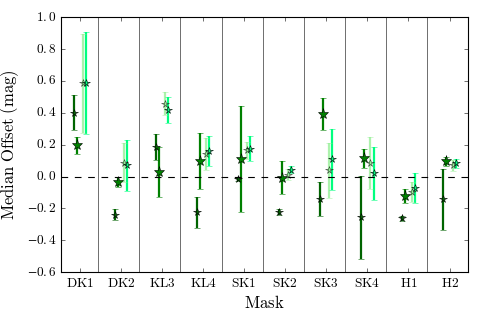

In [35]:
fig = pickle.load(file('figures_for_zfire_survey/scaling_values_with_diff_slit_sizes_bs.pickle'))
plt.show()

###  Figure 21
Example Spectroscopic-photometric magnitude comparisions. 

<IPython.core.display.Javascript object>


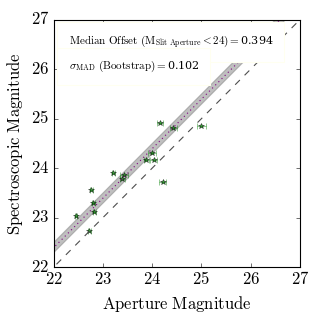

<IPython.core.display.Javascript object>


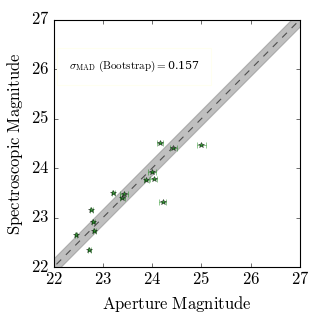

In [36]:
#KL3 before scaling
fig = pickle.load(file('figures_for_zfire_survey/magcomp_KL3_bs_comp.pickle'))
plt.show()
#KL3 after scaling
fig = pickle.load(file('figures_for_zfire_survey/magcomp_KL3_as_comp.pickle'))
plt.show()

<IPython.core.display.Javascript object>


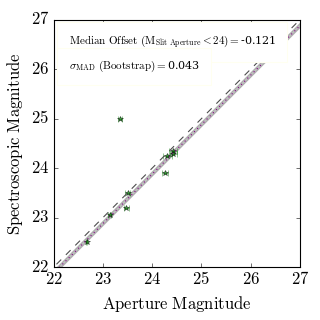

<IPython.core.display.Javascript object>


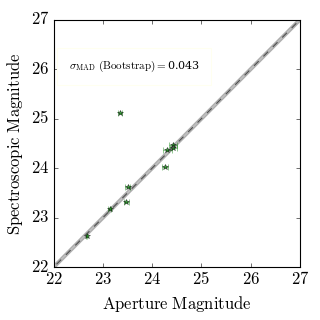

In [37]:
#H1 before scaling
fig = pickle.load(file('figures_for_zfire_survey/magcomp_H1_bs_comp.pickle'))
plt.show()
#H1 after scaling
fig = pickle.load(file('figures_for_zfire_survey/magcomp_H1_as_comp.pickle'))
plt.show()

###  Figure 22
Detection levels with public ZFOURGE catalogues. 

<IPython.core.display.Javascript object>


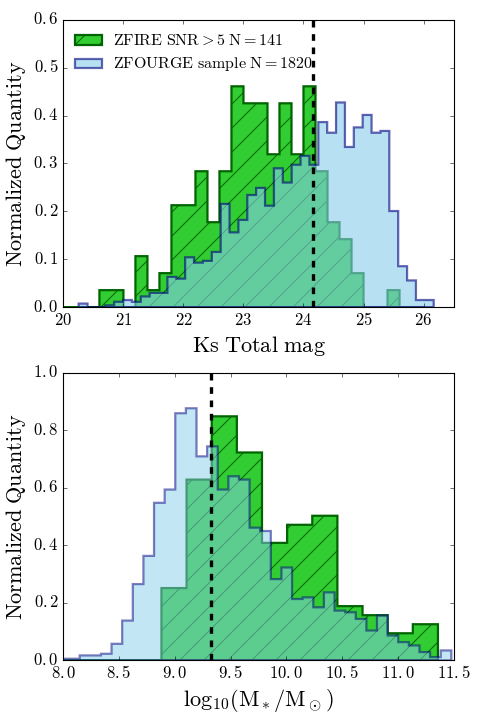

In [38]:
fig = pickle.load(file('figures_for_zfire_survey/detected_limits_newcat.pickle'))
plt.show()


###  Figure 23
Ks mag and photometric redshift differences between ZFOURGE catalogues

<IPython.core.display.Javascript object>


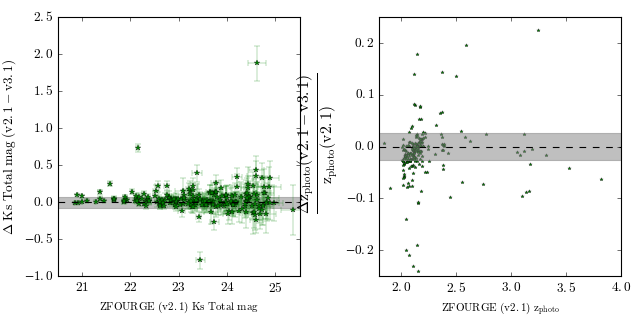

In [39]:
fig = pickle.load(file('figures_for_zfire_survey/cat_differences.pickle'))
plt.show()

###  Figure 24
Spec-z photo-z comparision with ZFOURGE v2.1 catalogues. 

<IPython.core.display.Javascript object>


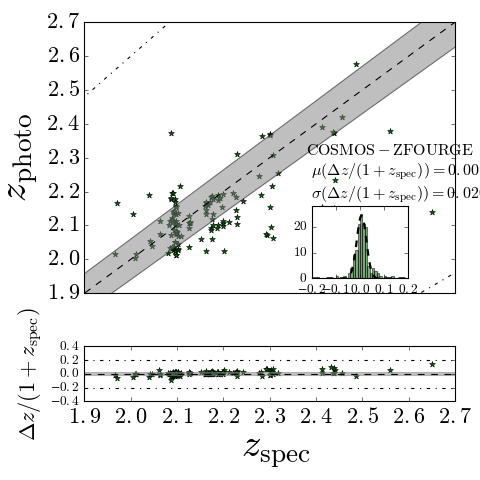

In [40]:
fig = pickle.load(file('figures_for_zfire_survey/specz_vs_photo_z_COSMOS_v2.1.pickle'))
plt.show()